In [1]:
#import thư viện
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
#Đọc file dữ liệu
spamdf = pd.read_excel("df_train.xlsx")
print (spamdf.head(5))

   capital_run_length_average  capital_run_length_longest  \
0                        0.00                        0.64   
1                        0.21                        0.28   
2                        0.06                        0.00   
3                        0.00                        0.00   
4                        0.00                        0.00   

   capital_run_length_total  char_freq_1  char_freq_2  char_freq_3  \
0                      0.64          0.0         0.32         0.00   
1                      0.50          0.0         0.14         0.28   
2                      0.71          0.0         1.23         0.19   
3                      0.00          0.0         0.63         0.00   
4                      0.00          0.0         0.63         0.00   

   char_freq_4  char_freq_5  char_freq_6  word_freq_1  ...  word_freq_45  \
0         0.00         0.00         0.00         0.00  ...          0.00   
1         0.21         0.07         0.00         0.94  ...  

In [3]:
#Danh sách features
spam_drop_y = spamdf.drop("spam", axis=1)
features_cols = spam_drop_y.columns.to_list()
print (features_cols)

['capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total', 'char_freq_1', 'char_freq_2', 'char_freq_3', 'char_freq_4', 'char_freq_5', 'char_freq_6', 'word_freq_1', 'word_freq_10', 'word_freq_11', 'word_freq_12', 'word_freq_13', 'word_freq_14', 'word_freq_15', 'word_freq_16', 'word_freq_17', 'word_freq_18', 'word_freq_19', 'word_freq_2', 'word_freq_20', 'word_freq_21', 'word_freq_22', 'word_freq_23', 'word_freq_24', 'word_freq_25', 'word_freq_26', 'word_freq_27', 'word_freq_28', 'word_freq_29', 'word_freq_3', 'word_freq_30', 'word_freq_31', 'word_freq_32', 'word_freq_33', 'word_freq_34', 'word_freq_35', 'word_freq_36', 'word_freq_37', 'word_freq_38', 'word_freq_39', 'word_freq_4', 'word_freq_40', 'word_freq_41', 'word_freq_42', 'word_freq_43', 'word_freq_44', 'word_freq_45', 'word_freq_46', 'word_freq_47', 'word_freq_48', 'word_freq_5', 'word_freq_6', 'word_freq_7', 'word_freq_8', 'word_freq_9']


In [4]:
#Biến độc lập và biến phụ thuộc
X = spamdf[features_cols]
y = spamdf.spam

In [5]:
#Tạo bộ dữ liệu huấn luyện và kiểm thử
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=16)
print(X_train.shape); print(X_test.shape)

(4140, 57)
(461, 57)


In [35]:
X_train.to_excel("X_train.xlsx")

I. NEURAL NETWORK

In [26]:
#NN Implementation
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(58,58,58), activation='relu', solver='adam', max_iter=700)
mlp.fit(X_train,y_train)

predict_train_NN = mlp.predict(X_train)
predict_test_NN = mlp.predict(X_test)

In [27]:
#NN Eval
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predict_test_NN))
print(classification_report(y_test,predict_test_NN))

[[269  17]
 [ 11 164]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       286
           1       0.91      0.94      0.92       175

    accuracy                           0.94       461
   macro avg       0.93      0.94      0.94       461
weighted avg       0.94      0.94      0.94       461



In [13]:
predict_test_NN

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,

II. SVM

In [8]:
#SVM Implementation
from sklearn.svm import SVC
SVM = SVC(kernel= 'poly')
SVM.fit(X_train,y_train)

SVC(kernel='poly')

In [9]:
predict_train_SVM = SVM.predict(X_train)
predict_test_SVM = SVM.predict(X_test)
print (predict_train_SVM)
print (predict_test_SVM)

[0 0 0 ... 0 1 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [10]:
predict_train_SVM_df = pd.DataFrame(predict_train_SVM)
predict_train_SVM_df.to_excel("predict_train_SVM.xlsx")

In [12]:
#SVM Eval
print(confusion_matrix(y_test,predict_test_SVM))
print(classification_report(y_test,predict_test_SVM))

[[280   6]
 [148  27]]
              precision    recall  f1-score   support

           0       0.65      0.98      0.78       286
           1       0.82      0.15      0.26       175

    accuracy                           0.67       461
   macro avg       0.74      0.57      0.52       461
weighted avg       0.72      0.67      0.59       461



III. LOGISTIC REGRESSION

In [14]:
#Logistic Regression implementation
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression ()
LogReg.fit(X_train,y_train)
predict_train_LogReg = LogReg.predict(X_train)
predict_test_LogReg = LogReg.predict(X_test)
print (predict_train_LogReg)
print (predict_test_LogReg)

[0 0 0 ... 1 1 0]
[1 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0
 1 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0
 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0
 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1
 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0
 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0
 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0
 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0
 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0
 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1
 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1]


/Users/macos/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
#LogReg eval
print(confusion_matrix(y_test,predict_test_LogReg))
print(classification_report(y_test,predict_test_LogReg))

[[266  20]
 [ 22 153]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       286
           1       0.88      0.87      0.88       175

    accuracy                           0.91       461
   macro avg       0.90      0.90      0.90       461
weighted avg       0.91      0.91      0.91       461



IV. DECISION TREE

In [22]:
from sklearn.tree import DecisionTreeClassifier
DecTree = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=1)
DecTree.fit(X_train,y_train)
predict_train_DecTree = DecTree.predict(X_train)
predict_test_DecTree = DecTree.predict(X_test)
print (predict_train_DecTree)
print (predict_test_DecTree)

[0 0 0 ... 1 1 0]
[1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0
 1 1 0 1 0 1 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0
 0 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1
 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1
 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0
 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1
 1 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0
 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1]


In [23]:
#DecTree eval
print(confusion_matrix(y_test,predict_test_DecTree))
print(classification_report(y_test,predict_test_DecTree))

[[267  19]
 [ 20 155]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       286
           1       0.89      0.89      0.89       175

    accuracy                           0.92       461
   macro avg       0.91      0.91      0.91       461
weighted avg       0.92      0.92      0.92       461



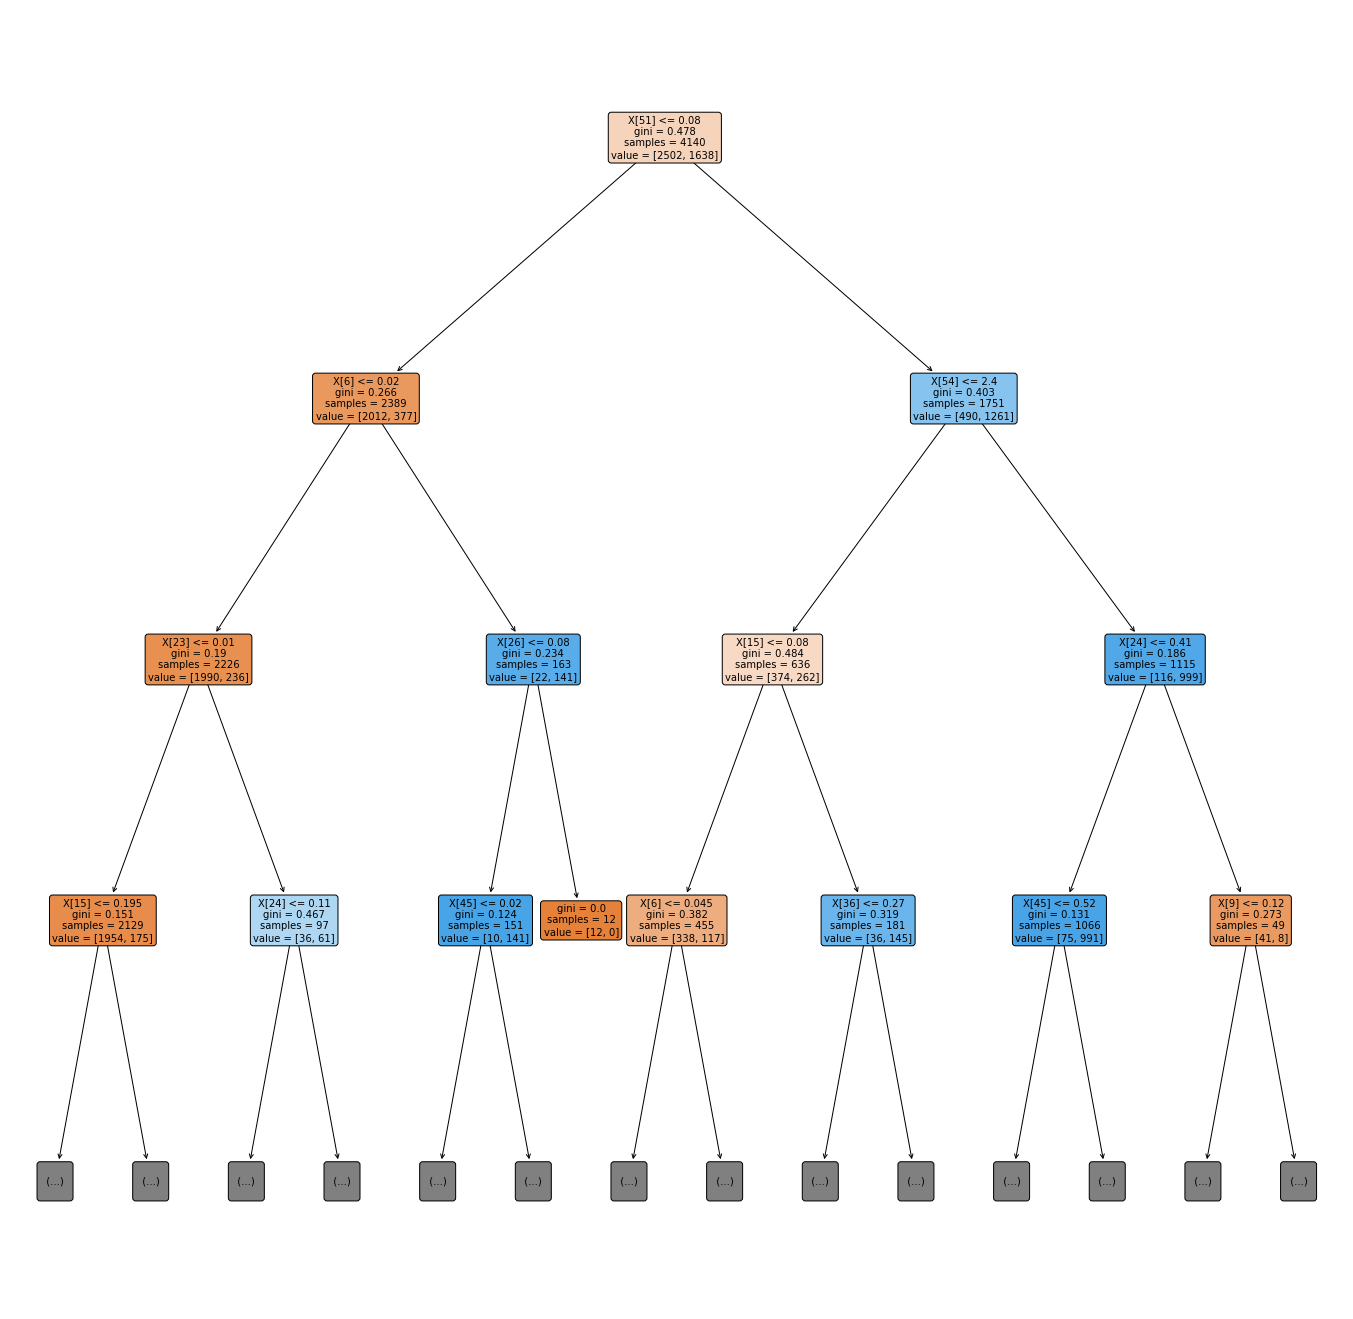

In [29]:
#Visualize tree
from sklearn import tree
fig, ax = plt.subplots(figsize=(24, 24))
tree.plot_tree(DecTree, filled=True, 
              rounded=True, fontsize=10, max_depth= 3)
plt.show()

In [32]:
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_train, predict_train_NN)
print(f"ROC AUC: {score:.4f}")


ROC AUC: 0.9417


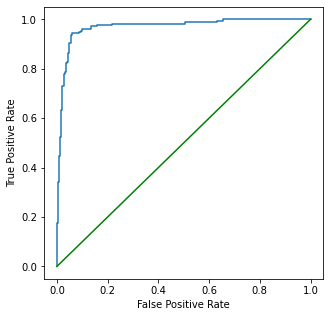

In [34]:
# Vẽ ROC curve của mô hình NN
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
y_proba = mlp.predict_proba(X_test)
def plot_sklearn_roc_curve(y_real, y_pred):
    fpr, tpr, _ = roc_curve(y_real, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')
# Plots the ROC curve using the sklearn methods - Good plot
plot_sklearn_roc_curve(y_test, y_proba[:, 1])

In [62]:
pred_result =  pd.DataFrame(predict_test_NN.tolist ())
pred_result.to_excel("pred_result.xlsx")
y_test.to_excel("Y_test.xlsx")


TIẾN HÀNH DỰ ĐOÁN

In [40]:
#Lấy ngẫu nhiên 10%
pred_samp = spamdf.sample(frac=.10)
print (len(pred_samp))
pred_samp.to_excel("Spam10.xlsx")

460


In [46]:
#Bỏ biến target
pred_samp_dropY = pred_samp.drop("spam", axis=1)
print (pred_samp_dropY.head(5))

      capital_run_length_average  capital_run_length_longest  \
2992                        0.00                        0.00   
1967                        0.00                        0.00   
3270                        0.00                        0.00   
4043                        0.34                        0.00   
549                         0.33                        0.67   

      capital_run_length_total  char_freq_1  char_freq_2  char_freq_3  \
2992                       0.0          0.0         0.36          0.0   
1967                       0.0          0.0         0.00          0.0   
3270                       0.0          0.0         1.63          0.0   
4043                       0.0          0.0         0.00          0.0   
549                        0.0          0.0         0.00          0.0   

      char_freq_4  char_freq_5  char_freq_6  word_freq_1  ...  word_freq_44  \
2992         0.00         0.00         0.00         0.00  ...          0.36   
1967         0.00 

In [48]:
#Dự đoán
pred = mlp.predict(pred_samp_dropY)
print (pred)


[0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1
 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1
 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1
 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0
 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0
 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0
 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1
 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 1]


In [49]:
#Lưu kq dự đoán
pred_DF = pd.DataFrame(pred)
pred_DF.to_excel("Predict.xlsx")